# Spam SMS Detection 
Build an AI model that can classify SMS messages as spam or 
legitimate. Use techniques like TF-IDF or word embeddings with 
classifiers like Naive Bayes, Logistic Regression, or Support Vector 
Machines to identify spam message

In [1]:
# Required Libraries 
# type: ignore

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load Dataset 

path = 'spam.csv'
df = pd.read_csv(path, encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 1. Data Cleaning

In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

- As you can see, In last 3 columns, there are lots of missing values.
- We can drop those columns

In [4]:
# Drop columns

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Encoding 

encoder = LabelEncoder()

In [6]:
df['v1'] = encoder.fit_transform(df['v1'])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
# Check Duplicate data

df.duplicated().sum()

403

In [9]:
# Remove Duplicated Rows

df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

# 2. EDA

In [11]:
df['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

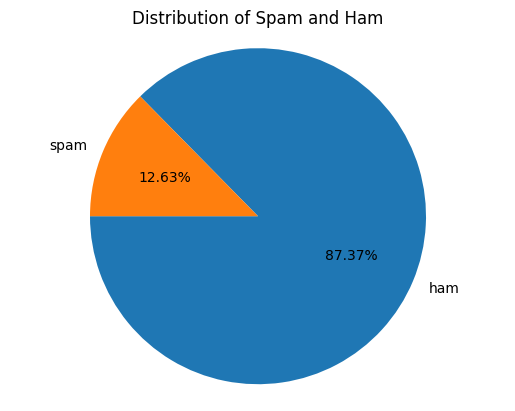

In [12]:
plt.pie(df['v1'].value_counts(), labels=['ham', 'spam'], autopct='%.2f%%', startangle=180)
plt.title('Distribution of Spam and Ham')
plt.axis('equal')
plt.show()

Data imbalanced

In [13]:
import nltk

# nltk.download('punkt')
# nltk.download('punkt_tab')


In [14]:
df['Num_char'] = df['v2'].apply(len)
df.head()

,v1,v2,Num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
# find number of words

df['words'] = df['v2'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,v1,v2,Num_char,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
# find number of sentences

df['Sentence_Count'] = df['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,v1,v2,Num_char,words,Sentence_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['Num_char', 'words', 'Sentence_Count']].describe()

,Num_char,words,Sentence_Count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
# ham

df[df['v1'] == 0][['Num_char', 'words', 'Sentence_Count']].describe()

,Num_char,words,Sentence_Count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# spam 

df[df['v1'] == 1][['Num_char', 'words', 'Sentence_Count']].describe()

,Num_char,words,Sentence_Count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


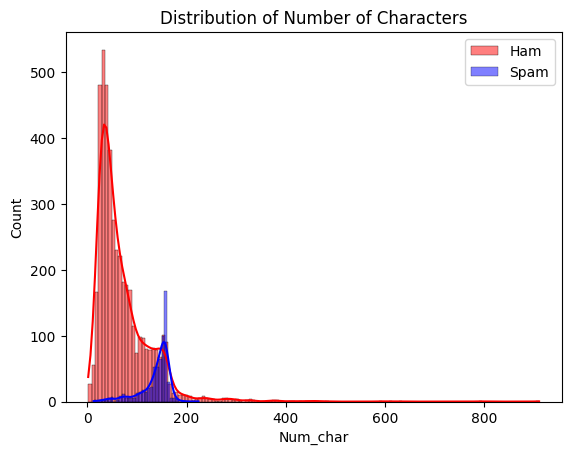

In [20]:
sns.histplot(df[df['v1'] == 0]['Num_char'], kde=True, color='red', label='Ham')
sns.histplot(df[df['v1'] == 1]['Num_char'], kde=True, color='blue', label='Spam')
plt.title('Distribution of Number of Characters')
plt.legend()
plt.show()

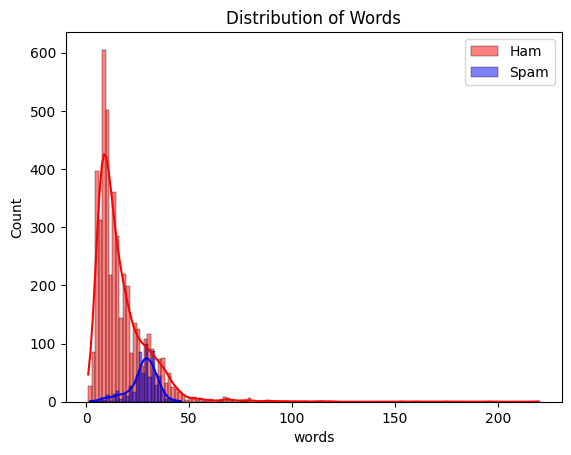

In [21]:
sns.histplot(df[df['v1'] == 0]['words'], kde=True, color='red', label='Ham')
sns.histplot(df[df['v1'] == 1]['words'], kde=True, color='blue', label='Spam')
plt.title('Distribution of Words')
plt.legend()
plt.show()

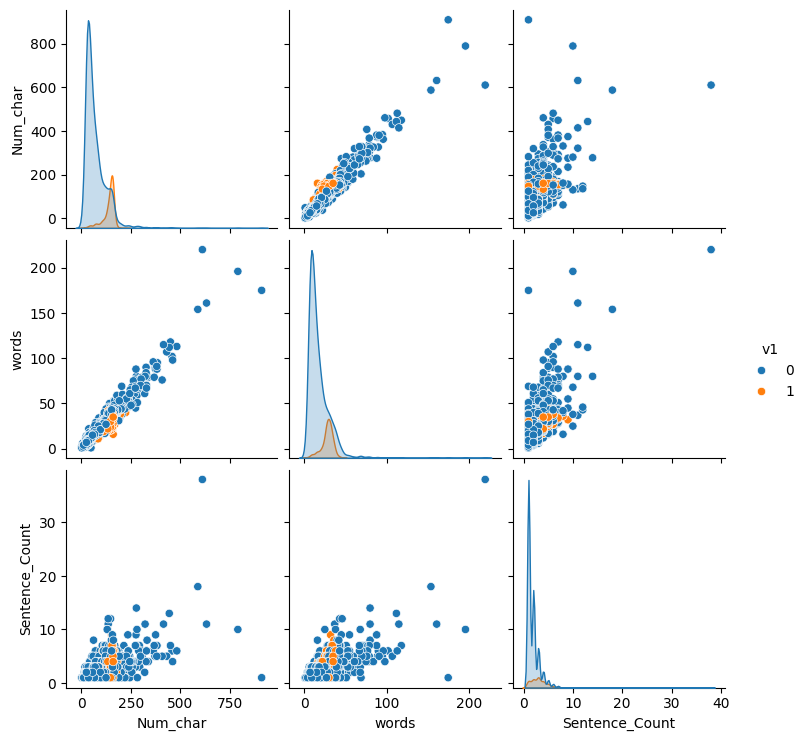

In [22]:
sns.pairplot(data=df, hue='v1')

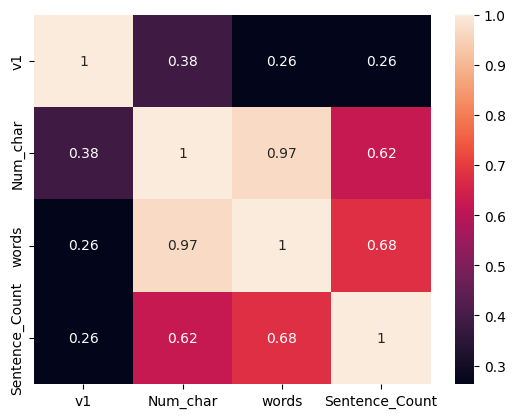

In [23]:
# Remove non-numeric columns before creating correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# 3. Data Preprocessing

- Lower case
- Tokenization
- Remove special characters
- Remove punctuations & stopwords
- Stemming


In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Crying')

'cri'

In [27]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    text = [i for i in text if i.isalnum()]
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]
    text = [ps.stem(i) for i in text]

    return " ".join(text)

In [28]:
df['transformed_txt'] = df['v2'].apply(transform_text)
df.head()

,v1,v2,Num_char,words,Sentence_Count,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


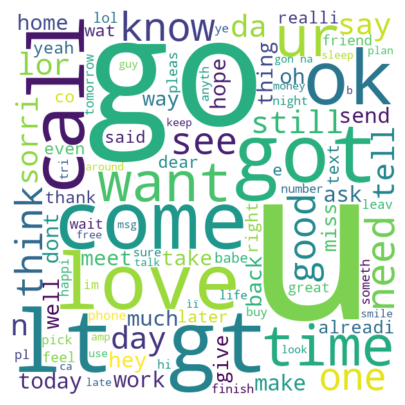

In [29]:
from wordcloud import WordCloud

# Create a word cloud
wc = WordCloud(width=600, height=600, max_words=100, background_color='white')

# Generate the word cloud
spam_wc = wc.generate(df[df['v1'] == 0]['transformed_txt'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

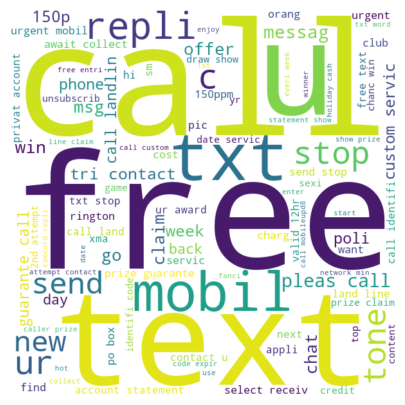

In [30]:
ham_wc = wc.generate(df[df['v1'] == 1]['transformed_txt'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(10, 5)) 
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
spam_crps = []
for msgs in df[df['v1'] == 1]['transformed_txt'].tolist():
    for word in msgs.split():
        spam_crps.append(word)

In [32]:
len(spam_crps)

9939

In [33]:
from collections import Counter

spam = pd.DataFrame(Counter(spam_crps).most_common(25))
spam.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


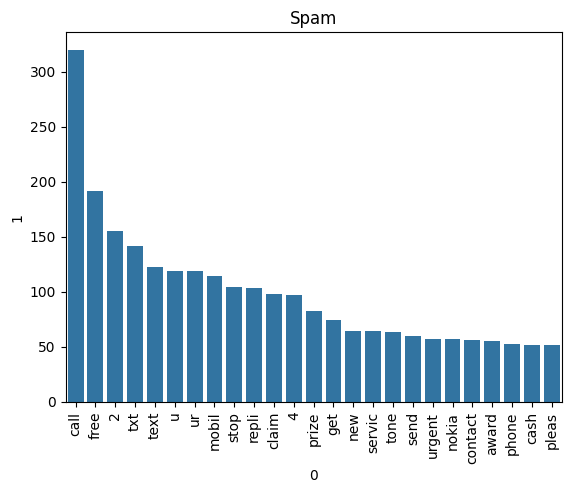

In [34]:
from cv2 import rotate
from sympy import rotations

sns.barplot(data=spam, x=0, y= 1)
plt.title('Spam')
plt.xticks(rotation = "vertical")
plt.show()

In [35]:
ham_crps = []
for msgs in df[df['v1'] == 0]['transformed_txt'].tolist():
    for word in msgs.split():
        ham_crps.append(word)

In [36]:
len(ham_crps)

35404

In [37]:
ham = pd.DataFrame(Counter(ham_crps).most_common(25))
ham.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


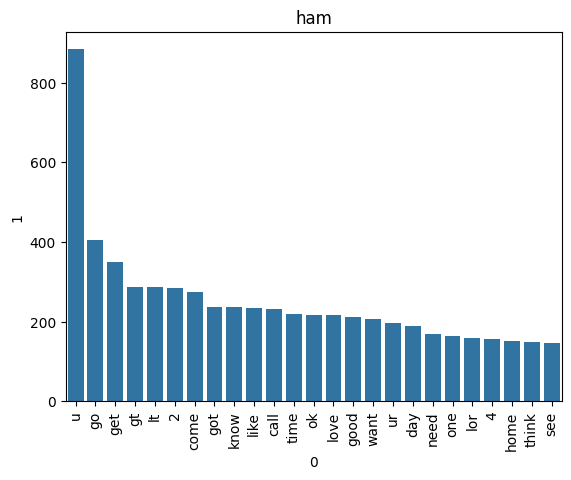

In [38]:
sns.barplot(data=ham, x=0, y= 1)
plt.title('ham')
plt.xticks(rotation = "vertical")
plt.show()

# 4. Model Building

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000)

In [153]:
tfidf = TfidfVectorizer()

In [154]:
X = tfidf.fit_transform(df['transformed_txt']).toarray()

In [155]:
# appending the num_character col to X
X = np.hstack((X,df['Num_char'].values.reshape(-1,1)))

In [156]:
X.shape

(5169, 6709)

In [157]:
y = df['v1'].values

In [158]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [161]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , classification_report, f1_score, recall_score, ConfusionMatrixDisplay

In [162]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [163]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8945841392649904
[[806  90]
 [ 19 119]]
0.569377990430622


In [164]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
accuracy_score(y_test, y_pred2)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.867504835589942
[[896   0]
 [137   1]]
1.0


In [165]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
accuracy_score(y_test, y_pred3)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [166]:
# tfidf --> MNB

In [167]:
# Other ml modals for comparision

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


## 1. Support Vector Machine

In [168]:
SVC = SVC(kernel='sigmoid', gamma=0.1, C=10)
SVC.fit(X_train, y_train)
y_pred4 = SVC.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(precision_score(y_test, y_pred4))

0.8597678916827853
[[889   7]
 [138   0]]
0.0


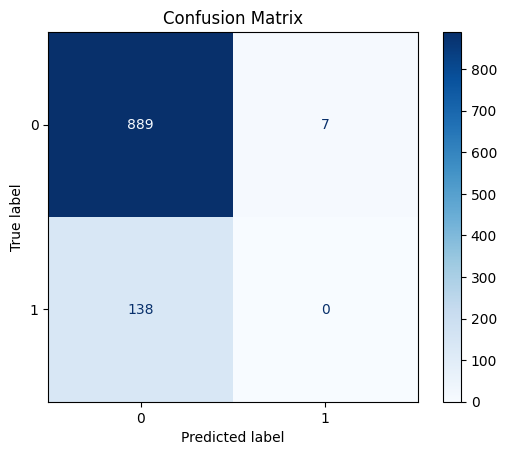

In [169]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred4, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 2. Random Forest Classifier

In [170]:
rfc = RandomForestClassifier(n_estimators=100, random_state=2)
rfc.fit(X_train, y_train)
y_pred5 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred5))
print(confusion_matrix(y_pred5, y_test))
print(precision_score(y_pred5, y_test))

0.9758220502901354
[[895  24]
 [  1 114]]
0.8260869565217391


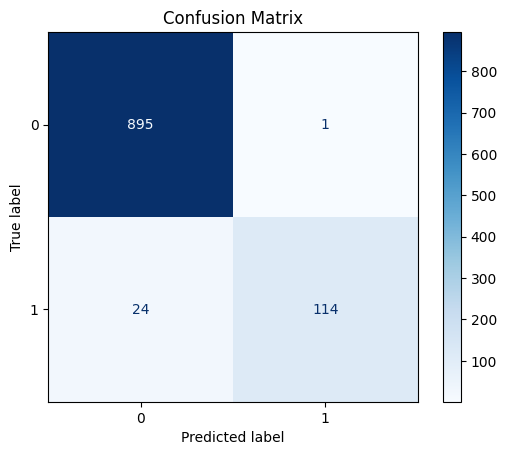

In [171]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred5, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 3. Decision Tree Classification

In [172]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)
y_pred6 = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))
print(precision_score(y_test, y_pred6))

0.9545454545454546
[[878  18]
 [ 29 109]]
0.8582677165354331


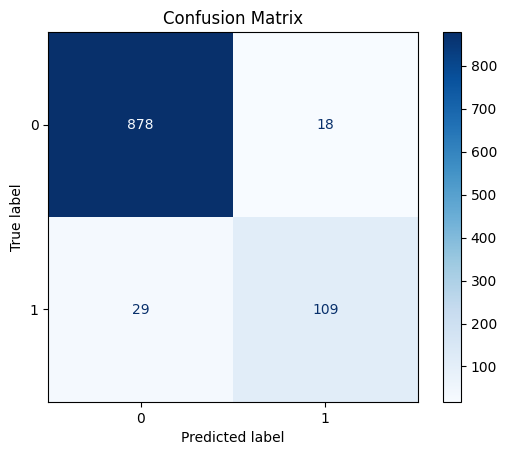

In [173]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred6, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 4. Multinomial Naive Bayes Classifier

In [174]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

0.867504835589942
[[896   0]
 [137   1]]
1.0
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       896
           1       1.00      0.01      0.01       138

    accuracy                           0.87      1034
   macro avg       0.93      0.50      0.47      1034
weighted avg       0.89      0.87      0.81      1034



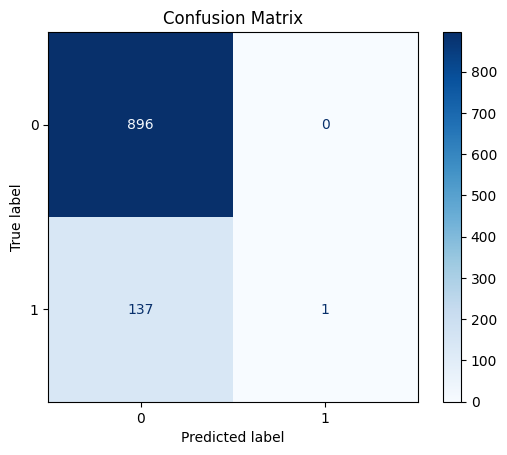

In [175]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 5. Add Boost Classifier

In [176]:
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(X_train, y_train)
y_pred7 = abc.predict(X_test)
print(accuracy_score(y_test, y_pred7))
print(confusion_matrix(y_test, y_pred7))
print(precision_score(y_test, y_pred7))
print(classification_report(y_test, y_pred7))

c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9642166344294004
[[887   9]
 [ 28 110]]
0.9243697478991597
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.92      0.80      0.86       138

    accuracy                           0.96      1034
   macro avg       0.95      0.89      0.92      1034
weighted avg       0.96      0.96      0.96      1034



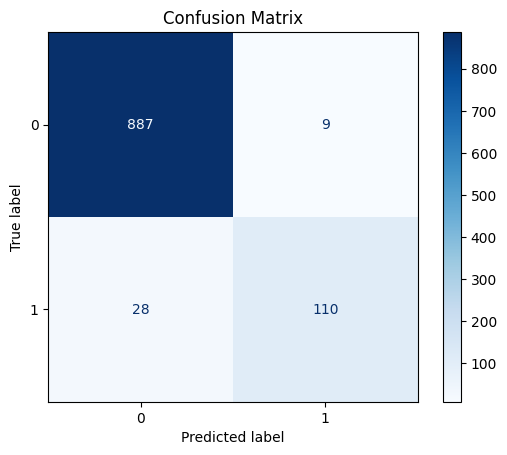

In [177]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred7, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 6. Gradient Boosting Classifier

In [178]:
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2) 
gbc.fit(X_train, y_train)
y_pred8 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred8))
print((confusion_matrix(y_test, y_pred8)))
print(precision_score(y_test, y_pred8))
print(classification_report(y_test, y_pred8))

0.9516441005802708
[[889   7]
 [ 43  95]]
0.9313725490196079
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       896
           1       0.93      0.69      0.79       138

    accuracy                           0.95      1034
   macro avg       0.94      0.84      0.88      1034
weighted avg       0.95      0.95      0.95      1034



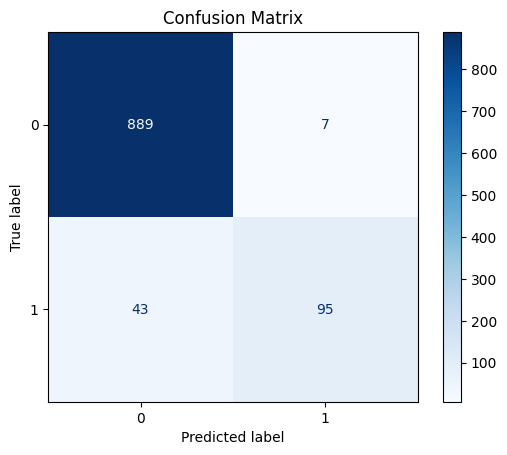

In [179]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred8, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 7. Bagging Classifier

In [180]:
bc = BaggingClassifier(n_estimators=50, random_state=2)
bc.fit(X_train, y_train)
y_pred9 = bc.predict(X_test)
print(accuracy_score(y_test, y_pred9))
print(confusion_matrix(y_test, y_pred9))
print(precision_score(y_test, y_pred9))
print(classification_report(y_test, y_pred9))

0.9622823984526112
[[883  13]
 [ 26 112]]
0.896
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.90      0.81      0.85       138

    accuracy                           0.96      1034
   macro avg       0.93      0.90      0.92      1034
weighted avg       0.96      0.96      0.96      1034



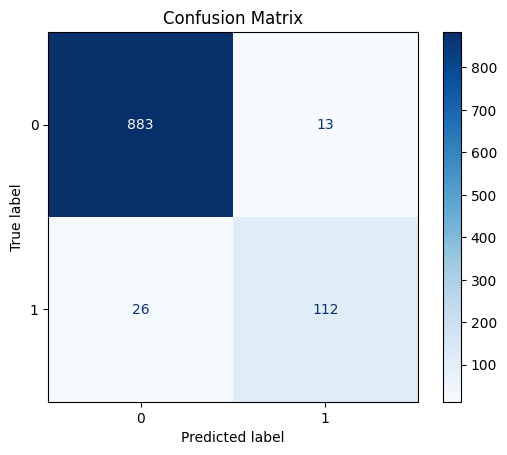

In [181]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred9, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 8. Extra Tree Classifier

In [182]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
etc.fit(X_train, y_train)
y_pred10 = etc.predict(X_test)
print(accuracy_score(y_test, y_pred10))
print(confusion_matrix(y_test, y_pred10))
print(precision_score(y_test, y_pred10))
print(classification_report(y_test, y_pred10))

0.9748549323017408
[[893   3]
 [ 23 115]]
0.9745762711864406
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.97      0.83      0.90       138

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



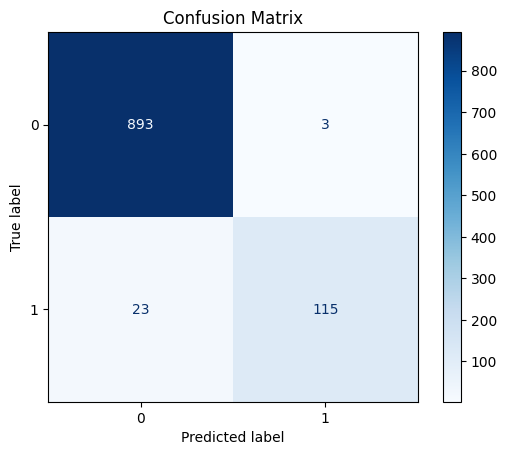

In [183]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred10, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 9. XGBoost Classifier

In [184]:
xgb =  XGBClassifier(n_estimators=50, random_state=2)
xgb.fit(X_train, y_train)
y_pred11 = xgb.predict(X_test)
print(accuracy_score(y_test, y_pred11))
print(confusion_matrix(y_test, y_pred11))
print(precision_score(y_test, y_pred11))
print(classification_report(y_test, y_pred11))

0.9680851063829787
[[888   8]
 [ 25 113]]
0.9338842975206612
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.93      0.82      0.87       138

    accuracy                           0.97      1034
   macro avg       0.95      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



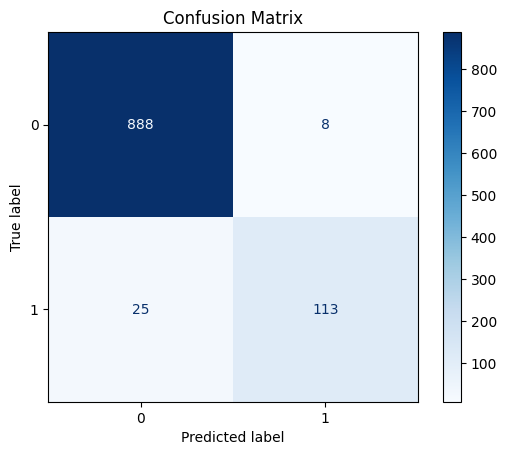

In [185]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred11, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 10. Logistic Regression

In [186]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred12 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred12))
print(confusion_matrix(y_test, y_pred12))
print(precision_score(y_test, y_pred12))
print(classification_report(y_test, y_pred12))


0.9555125725338491
[[894   2]
 [ 44  94]]
0.9791666666666666
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       0.98      0.68      0.80       138

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



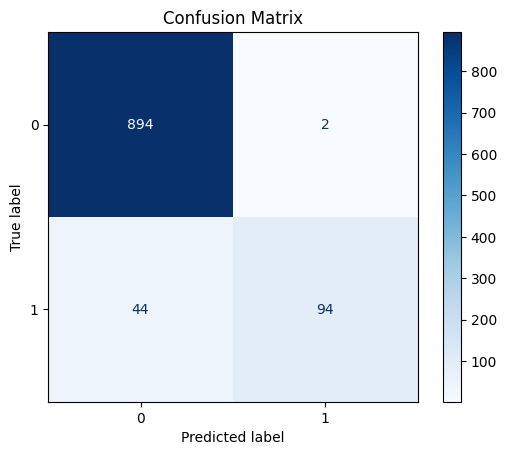

In [187]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred12, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## 11. KNN Classifier

In [188]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred13 = knc.predict(X_test)
print(accuracy_score(y_test, y_pred13))
print(confusion_matrix(y_test, y_pred13))
print(precision_score(y_test, y_pred13))
print(classification_report(y_test, y_pred13))

0.9313346228239845
[[876  20]
 [ 51  87]]
0.8130841121495327
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       896
           1       0.81      0.63      0.71       138

    accuracy                           0.93      1034
   macro avg       0.88      0.80      0.84      1034
weighted avg       0.93      0.93      0.93      1034



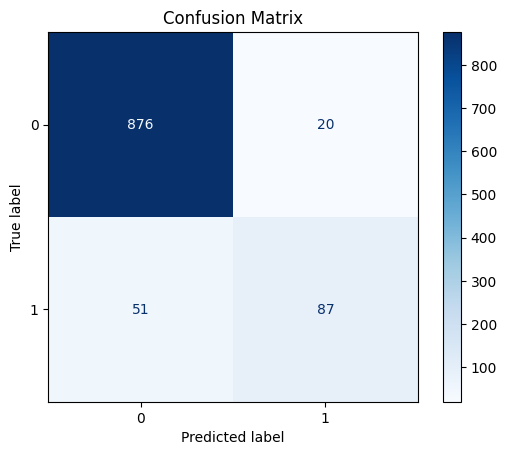

In [189]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred13, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

## Classifier Models

In [190]:
clfs = {
    'SVC': SVC,
    'RFC': rfc,
    'DTC': dtc,
    'MNB': mnb,
    'ABC': abc,
    'GBC': gbc,
    'BC': bc,
    'ETC': etc,
    'XGB': xgb,
    'LR': lr,
    'KNC': knc
}

In [191]:
def train_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # recall = recall_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision

In [192]:
train_clf(knc, X_train, y_train, X_test, y_test)

(0.9313346228239845, 0.8130841121495327)

In [193]:
accuracy_scores = []
precision_scores = []

# recall_scores = []
# f1_scores = []

In [194]:
for name, clf in clfs.items():
    cur_accuracy, cur_precision = train_clf(clf, X_train, y_train, X_test, y_test)

    print(f"Accuracy: {cur_accuracy:.4f}")
    print(f"Precision: {cur_precision:.4f}")
    
    # print(f"Recall: {cur_recall:.4f}")
    # print(f"F1 Score: {cur_f1:.4f}")

    accuracy_scores.append(cur_accuracy)
    precision_scores.append(cur_precision)
    
    # recall_scores.append(cur_recall)
    # f1_scores.append(cur_f1)

Accuracy: 0.8598
Precision: 0.0000
Accuracy: 0.9758
Precision: 0.9913
Accuracy: 0.9536
Precision: 0.8358
Accuracy: 0.8675
Precision: 1.0000


c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9642
Precision: 0.9244
Accuracy: 0.9516
Precision: 0.9314
Accuracy: 0.9623
Precision: 0.8960
Accuracy: 0.9749
Precision: 0.9746
Accuracy: 0.9681
Precision: 0.9339
Accuracy: 0.9555
Precision: 0.9792
Accuracy: 0.9313
Precision: 0.8131


In [83]:
# performance_df = pd.DataFrame({'Model': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values(by='Accuracy', ascending=False)
performance_df = pd.DataFrame({'Model': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values(by='Precision', ascending=False)
performance_df

,Model,Accuracy,Precision
3,MNB,0.959381,1.000000
10,KNC,0.900387,1.000000
1,RFC,0.973888,0.991150
9,LR,0.947776,0.988372
7,ETC,0.972921,0.982456
0,SVC,0.978723,0.975410
4,ABC,0.961315,0.945455
8,XGB,0.972921,0.943548
5,GBC,0.952611,0.923810
6,BC,0.958414,0.862595


In [84]:
# Reshape DataFrame to long format
performance_long = performance_df.melt(id_vars=['Model'], value_vars=['Accuracy', 'Precision'],var_name='Metric', value_name='Score')

## Plot Model Performance Comparison: Accuracy vs Precision

<Figure size 1000x500 with 0 Axes>

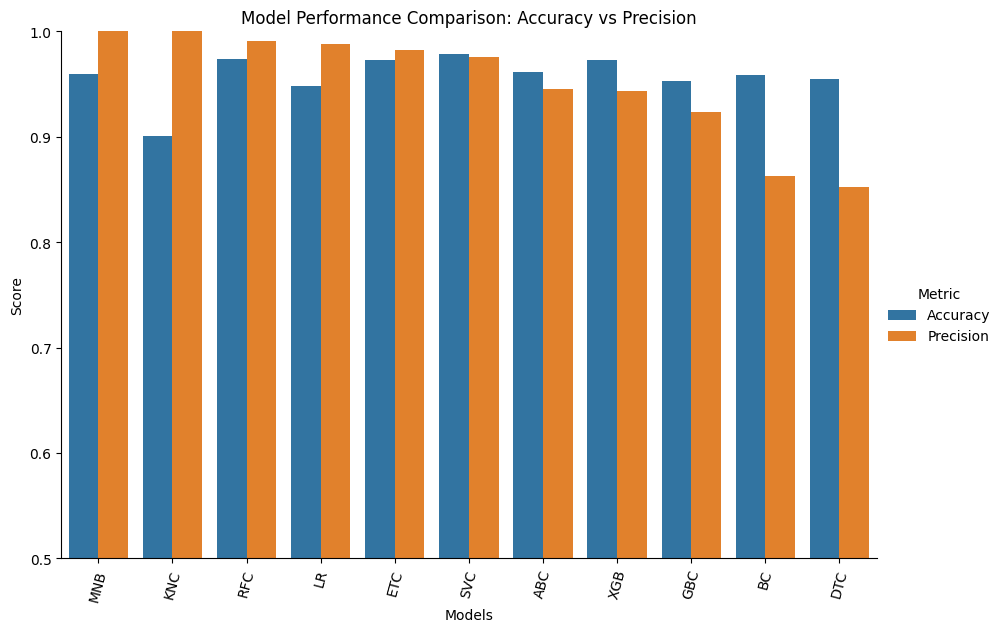

In [85]:
plt.figure(figsize=(10, 5))
sns.catplot(data=performance_long, x='Model', y='Score', hue='Metric', kind='bar', height=6, aspect=1.5)
plt.xticks(rotation=75)
plt.ylim(0.5, 1.0)
# Add title and labels
plt.title('Model Performance Comparison: Accuracy vs Precision')
plt.xlabel('Models')
plt.ylabel('Score')
plt.show()

In [ ]:
# Model performance 

# 1. Change the max_features parameter to Ifidf and run the model again.

In [151]:
new_df = pd.DataFrame({'Model': clfs.keys(), 'Accuracy_max_ft_4000': accuracy_scores, 'Precision_max_ft_4000': precision_scores}).sort_values(by='Precision_max_ft_4000', ascending=False)
new_df

,Model,Accuracy_max_ft_4000,Precision_max_ft_4000
3,MNB,0.968085,1.000000
10,KNC,0.904255,1.000000
9,LR,0.949710,0.988636
1,RFC,0.974855,0.982759
0,SVC,0.978723,0.975410
7,ETC,0.972921,0.974138
4,ABC,0.961315,0.962264
8,XGB,0.968085,0.933884
5,GBC,0.948743,0.929293
6,BC,0.954545,0.852713


In [152]:
merge_df = performance_df.merge(new_df, on = 'Model')
merge_df

,Model,Accuracy,Precision,Accuracy_max_ft_4000,Precision_max_ft_4000
0,MNB,0.959381,1.000000,0.968085,1.000000
1,KNC,0.900387,1.000000,0.904255,1.000000
2,RFC,0.973888,0.991150,0.974855,0.982759
3,LR,0.947776,0.988372,0.949710,0.988636
4,ETC,0.972921,0.982456,0.972921,0.974138
5,SVC,0.978723,0.975410,0.978723,0.975410
6,ABC,0.961315,0.945455,0.961315,0.962264
7,XGB,0.972921,0.943548,0.968085,0.933884
8,GBC,0.952611,0.923810,0.948743,0.929293
9,BC,0.958414,0.862595,0.954545,0.852713


In [ ]:
new_df1 = pd.DataFrame({'Model': clfs.keys(), 'Accuracy_num_char': accuracy_scores, 'Precision_num_char': precision_scores}).sort_values(by='Precision_num_char', ascending=False)
new_df1

,Model,Accuracy_num_char,Precision_num_char
3,MNB,0.867505,1.000000
1,RFC,0.975822,0.991304
9,LR,0.955513,0.979167
7,ETC,0.974855,0.974576
8,XGB,0.968085,0.933884
5,GBC,0.951644,0.931373
4,ABC,0.964217,0.924370
6,BC,0.962282,0.896000
2,DTC,0.953578,0.835821
10,KNC,0.931335,0.813084


In [196]:
merged_df = merge_df.merge(new_df1, on= 'Model')
merged_df

,Model,Accuracy,Precision,Accuracy_max_ft_4000,Precision_max_ft_4000,Accuracy_num_char,Precision_num_char
0,MNB,0.959381,1.000000,0.968085,1.000000,0.867505,1.000000
1,KNC,0.900387,1.000000,0.904255,1.000000,0.931335,0.813084
2,RFC,0.973888,0.991150,0.974855,0.982759,0.975822,0.991304
3,LR,0.947776,0.988372,0.949710,0.988636,0.955513,0.979167
4,ETC,0.972921,0.982456,0.972921,0.974138,0.974855,0.974576
5,SVC,0.978723,0.975410,0.978723,0.975410,0.859768,0.000000
6,ABC,0.961315,0.945455,0.961315,0.962264,0.964217,0.924370
7,XGB,0.972921,0.943548,0.968085,0.933884,0.968085,0.933884
8,GBC,0.952611,0.923810,0.948743,0.929293,0.951644,0.931373
9,BC,0.958414,0.862595,0.954545,0.852713,0.962282,0.896000


In [197]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier

KNC = knc
MNB = mnb 
RFC = rfc

In [198]:
voting = VotingClassifier(estimators=[('KNC', KNC), ('MNB', MNB), ('RFC', RFC)],voting='soft')

In [199]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('KNC', KNeighborsClassifier()),
                             ('MNB', MultinomialNB()),
                             ('RFC', RandomForestClassifier(random_state=2))],
                 voting='soft')

In [200]:
VotingClassifier(estimators=[('KNC', KNC), ('MNB', MNB), ('RFC', RFC)],voting='soft')

VotingClassifier(estimators=[('KNC', KNeighborsClassifier()),
                             ('MNB', MultinomialNB()),
                             ('RFC', RandomForestClassifier(random_state=2))],
                 voting='soft')

In [201]:
y_pred_ = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred_))
print("Precision",precision_score(y_test,y_pred_))

Accuracy 0.9284332688588007
Precision 1.0
